# Ex3: Distribution 2

## Bài 1:
#### Sinh viên nam tại một trường đại học X ở Việt Nam có chiều cao trung bình là 164cm. Các chiều cao thường được phân phối, với độ lệch chuẩn là 6cm. Cho biết giá trị ở phân vị thứ [99] của data normal.
- Chọn loại phân phối. Hãy tạo ra 1000 mẫu ngẫu nhiên theo mô tả trên
- Vẽ histogram quan sát. 
- Cho biết giá trị ở phân vị thứ [99] của bộ mẫu.
- Linh cao 174 cm. Tìm z-score cho chiều cao của Linh. Với z-score này thì ở phân vị thứ mấy?

## Bài 2: 
#### Cho dữ liệu people.txt chứa nhiệt độ, giới tính, nhịp tim của 130 người từ Journal of Statistics Education (Shoemaker 1996) 
- Đọc dữ liệu từ tập tin nói trên
- Vẽ histogram cho cột Tempt
- Tìm thống kê chung của Tempt. 
- Tìm mean, median, mode => cho nhận xét
- Cho biết giá trị Tempt ở phân vị thứ [0, 1, 2, 2.5, 97.5, 98, 99, 100 ] của cột Tempt 
- Tạo bộ mẫu có 10.000 'temperatures' theo normal distribution sử dụng mean standard deviation của bộ dữ liệu trên. Vẽ histogram để quan sát
- Cho biết Three-Sigma-Rules (khoảng thứ 1, 2, 3)
- Hoa có thân nhiệt 99.5. Tìm z-score cho thân nhiệt của Hoa. Với z-score này thì ở phân vị thứ mấy?

## Bài 1: Gợi ý

In [1]:
from scipy.stats import norm

In [21]:
# loc: mean, scale: standard deviation, size: number of random variates
mean = 164
std = 6
data_normal = norm.rvs(size=1000,loc=mean,scale=std)
#data_normal

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0,0.5,'Frequency'), Text(0.5,0,'Normal Distribution')]

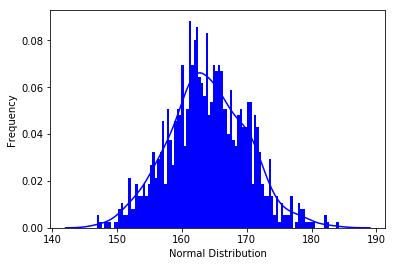

In [23]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [5]:
import numpy as np

In [24]:
# Cho biết giá trị ở phân vị thứ [99] của data normal.
percentiles = np.array([99])
x = np.percentile(data_normal, percentiles)
x

array([178.86140781])

In [25]:
# Linh cao 174 cm. Tìm z-score cho chiều cao của Linh.
# Với z-score này thì ở phân vị thứ mấy?
Linh_height = 174
z_score = (Linh_height - mean)/std
z_score

1.6666666666666667

- Z-score của Linh là 1.67. Điểm này ở 3/2 standard deviation trên mean. (phân vị thứ 2)

## Bài 2: Gợi ý

In [7]:
import pandas as pd
from scipy import stats 

In [27]:
data = pd.read_csv("Normtemp.txt", header=None, sep=" ")
data.head()

,0,1,2,3,4,5,6,7,8
0,96.3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,70.0
1,96.7,NaN,NaN,NaN,1.0,NaN,NaN,NaN,71.0
2,96.9,NaN,NaN,NaN,1.0,NaN,NaN,NaN,74.0
3,97.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,80.0
4,97.1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,73.0


In [9]:
data_n = data[[0, 4, 8]]
data_n.head()

,0,4,8
0,96.3,1.0,70.0
1,96.7,1.0,71.0
2,96.9,1.0,74.0
3,97.0,1.0,80.0
4,97.1,1.0,73.0


In [10]:
data_n.columns = ['Tempt', 'Gender', "Beats"]
data_n.head()

,Tempt,Gender,Beats
0,96.3,1.0,70.0
1,96.7,1.0,71.0
2,96.9,1.0,74.0
3,97.0,1.0,80.0
4,97.1,1.0,73.0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

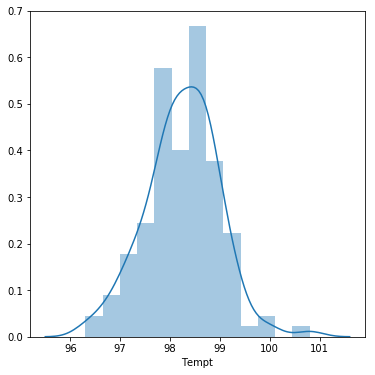

In [12]:
plt.figure(figsize=(6, 6))
sns.distplot(data_n.Tempt)
plt.show()

In [13]:
# thống kê chung
stats.describe(data_n.Tempt)

DescribeResult(nobs=130, minmax=(96.3, 100.8), mean=98.24923076923078, variance=0.5375575432319615, skewness=-0.004367976879198404, kurtosis=0.7049597854114715)

In [14]:
mean_T = data_n.Tempt.mean()
median_T = data_n.Tempt.median()
mode_T = data_n.Tempt.mode()
print(mean_T, median_T, mode_T)

98.24923076923076 98.3 0    98.0
dtype: float64


In [15]:
# Với kết quả như trên có thể thấy rằng đây là một phân phối khá chuẩn

In [16]:
# Cho biết giá trị ở phân vị thứ [0, 1, 2, 2.5, 97.5, 98, 99, 100 ] của Temperatures
percentiles = np.array([0, 1, 2, 2.5, 97.5, 98, 99, 100 ])
x = np.percentile(data_n.Tempt, percentiles)
x

array([ 96.3   ,  96.487 ,  96.7   ,  96.7225,  99.4775,  99.668 ,
        99.971 , 100.8   ])

In [17]:
# tạo bộ mẫu
# loc: mean, scale: standard deviation, size: number of random variates
samples = norm.rvs(size=10000,loc=mean_T,scale=data_n.Tempt.std())
samples

array([98.53154865, 97.53281879, 98.16332047, ..., 96.95527114,
       98.231744  , 98.69128521])

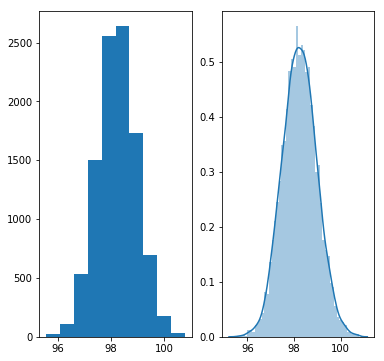

In [18]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.hist(samples)
plt.subplot(1, 2, 2)
sns.distplot(samples)
plt.show()

In [19]:
# Cho biết Three-Sigma-Rules (khoảng thứ 1, 2, 3)
varience = np.var(samples)
sigma = varience ** 0.5
three_sigmas = [sigma, sigma * 2, sigma * 3]
three_sigmas

[0.7363689937655895, 1.472737987531179, 2.2091069812967685]

In [20]:
std = np.std(samples)
three_sigmas_s2 = [std, std *2, std *3]
three_sigmas_s2

[0.7363689937655895, 1.472737987531179, 2.2091069812967685]

In [26]:
## Hoa có thân nhiệt 99.5. Tìm z-score cho thân nhiệt của Hoa. Với z-score này thì ở phân vị thứ mấy?
Hoa_tempt = 99.5
z_score = (Hoa_tempt - np.mean(samples))/std
z_score

0.21072439315575053

- Z-score của Hoa là 0.2. Điểm này ở 1/5 standard deviation trên mean. (phân vị thứ 1)